In [77]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

import OrthogonalPolynomials
# Reloading the module
import importlib
importlib.reload(OrthogonalPolynomials)
from OrthogonalPolynomials import *

## Legendre collocation method for 1D diffusion equation

In [78]:
# Node range: 0,1,...,N
N = 100
# Legendre Gauss Lobatto nodes
x = LegendreGaussLobattoNodes(N)
# Barycentric weights
w_bary = BarycentricWeights(x)
# Differentiation matrix
D = PolynomialDiffMatrix(x, w_bary)

In [79]:
# IC
def InitCond_1D(x):
    # Calculating the initial value at x
    return 0

u0 = np.zeros(N+1)
# The initial condition function may not be vectorized
# So we use a for loop to calculate the initial nodal values separately
for j in range(N+1):
    u0[j] = InitCond_1D(x[j])
    
# BC:
def BoundaryCondLeft(t):
    # Boundary condition at the left end
    # Time-dependent
    return np.sin(5*t)

In [80]:
# Evaluate the RHS of the ODE system
def RHS(t, u, D, N):
    # Evaluate the RHS of the ODE system for the 1D advection equation
    # Calculated with the differentiation matrix
    # Note that u_0 is set by the time-varying boundary condition
    # We only need to solve u1,...,u_N
    # u: u1 ... u_N
    # D: differentiation matrix
    # N: the largest node index
    
    # Adding the boundary values
    u_left = BoundaryCondLeft(t)
    u_all = np.concatenate(( np.array([u_left]), u ))
    RHS = -np.dot(D, u_all)
    # Only return the right-hand sides for u1 ... u_N
    return RHS[1:]

Text(0.5, 1.0, '$u_t + u_x = 0$')

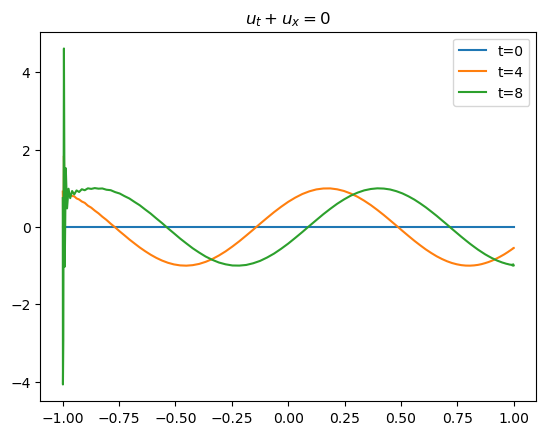

In [81]:
# Scipy calculation
t_span = [0, 8]
t_eval=[0,4,8]

sol = solve_ivp(RHS, 
                t_span=t_span, 
                y0=u0[1:], 
                method='RK45', 
                t_eval=t_eval, 
                args=(D, N),
                )

fig = plt.figure()
ax = fig.add_subplot(111)

Nt = len(t_eval)
for it in range(Nt):
    t = t_eval[it]
    u_left = BoundaryCondLeft(t)
    u = np.concatenate(( np.array([u_left]), sol.y[:,it] ))
    ax.plot(x, u, label='t={}'.format(t))


ax.legend()
ax.set_title(r'$u_t + u_x = 0$')

Text(0.5, 1.0, '$u_t=u_{xx}$')

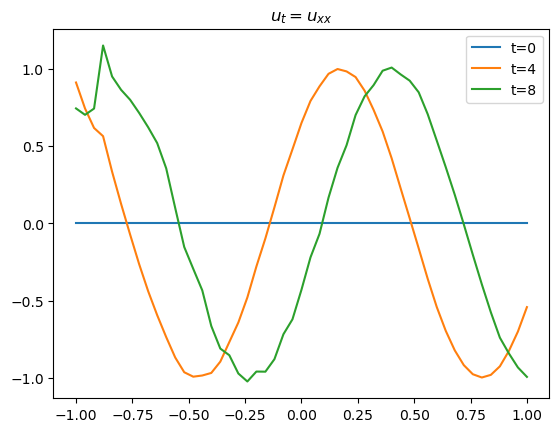

In [82]:
# Interpolating to a finer grid for plotting purpose
y = np.linspace(-1,1,51)
T = InterpolatingMatrix(x, y, w_bary)

fig = plt.figure()
ax = fig.add_subplot(111)

Nt = len(t_eval)
for it in range(Nt):
    t = t_eval[it]
    u_left = BoundaryCondLeft(t)
    u = np.concatenate(( np.array([u_left]), sol.y[:,it] ))
    u_newgrid = np.dot(T, u)
    ax.plot(y, u_newgrid, label='t={}'.format(t_eval[it]))


ax.legend()
ax.set_title(r'$u_t=u_{xx}$')